## Task 1: Brainstorming

**Step 1** 

Brainstorm three industries or topics that you most interested in exploring for this project.

- Industries I find interesting are health/wellness & beauty, music/entertainment, neuroscience
- Topics within mental health/wellness/beauty that I like are product sales, recommendations, and reviews
- Within music/entertainment, I find any data about music festivals interesting - setlists, their efficiency, and the guests that attend
- Data related to Parkinson's and neuroimaging is an interest of mine of mine, too.

**Step 2: Developing research questions**

1. Related to Parkinson's Disease (PD) can we predict a positive diagnosis for PD from healthy patients?
2. Which characteristics are most important when considering a postive diagnosis?
3. Can we track disease progression in PD patients considering their symptoms?

**Step 3: My Milestone Project 3 Research Question is:**

Related to Parkinson's Disease (PD) can we predict a positive diagnosis for PD from healthy patients?

### Task 2: Select a Data Set

**Step 1**

I have chosen the Parkinson's Telemonitoring Dataset from the UCI Machine Learning Repository. This dataset has 5875 instances and 26 attributes of biomedical voice measurements from 42 case studies. 
Citation: 
Tsanas,Athanasios & Little,Max. (2009). Parkinsons Telemonitoring. UCI Machine Learning Repository. https://doi.org/10.24432/C5ZS3N.

**Step 2**

My refined research question is:

Can we predict disease progression/symptoms in early PD patients using their motor and total UPDRS scores?

## Task 3: Exploratory Data Analysis

I will be using linear regression models to predict the outcomes of both the motor UPDRS and total UPDRS scores from voice measures data. 

**Step 2**

Since I would like to do a regression problem with this data, I will making sure that the data is numerical and there is nothing that needs to be encoded into separate attributes. Will look at ridge regression

In [1]:
#Step 3  - import and check data for criteria above:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error as MSE
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, AdaBoostClassifier


In [2]:
#!pip install xgboost

In [3]:
import xgboost as xgb

In [4]:
PD = pd.read_csv('parkinsons_updrs.data')
PD.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [5]:
# all data is numerical and does not need to be encoded, looking for nulls now
PD.isna().sum()

subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

In [6]:
PD.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [7]:
PD.dtypes

subject#           int64
age                int64
sex                int64
test_time        float64
motor_UPDRS      float64
total_UPDRS      float64
Jitter(%)        float64
Jitter(Abs)      float64
Jitter:RAP       float64
Jitter:PPQ5      float64
Jitter:DDP       float64
Shimmer          float64
Shimmer(dB)      float64
Shimmer:APQ3     float64
Shimmer:APQ5     float64
Shimmer:APQ11    float64
Shimmer:DDA      float64
NHR              float64
HNR              float64
RPDE             float64
DFA              float64
PPE              float64
dtype: object

In [8]:
PD.shape

(5875, 22)

In [9]:
#all the data are either integers or floats - no need to change

In [10]:
#create dataset without prediction column 'motor_UPDRS' - call this X
#create target column - call this y 
X = PD.drop(['motor_UPDRS', 'total_UPDRS'], axis = 1)
y = PD['motor_UPDRS']
y1 = PD['total_UPDRS']

In [11]:
y.describe()

count    5875.000000
mean       21.296229
std         8.129282
min         5.037700
25%        15.000000
50%        20.871000
75%        27.596500
max        39.511000
Name: motor_UPDRS, dtype: float64

<AxesSubplot: xlabel='Jitter(%)', ylabel='motor_UPDRS'>

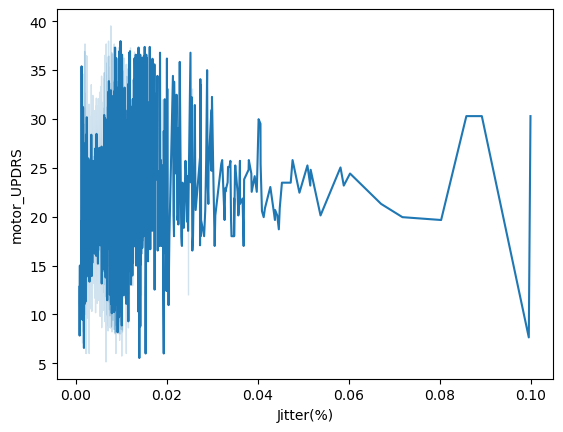

In [12]:
sns.lineplot(data = PD, x = 'Jitter(%)', y = 'motor_UPDRS')

<AxesSubplot: xlabel='Shimmer', ylabel='motor_UPDRS'>

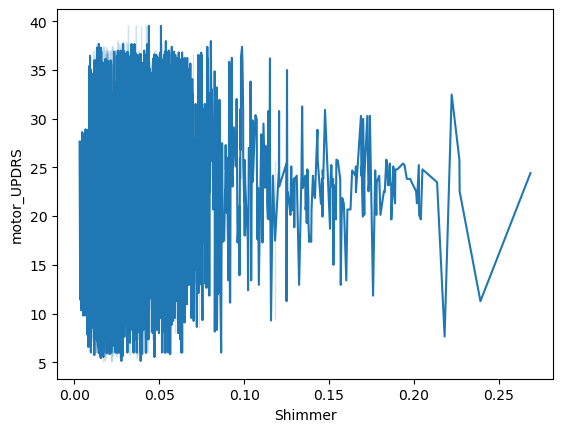

In [13]:
sns.lineplot(data = PD, x = 'Shimmer', y = 'motor_UPDRS')

In [14]:
#will split this data into training and test set
#since there are no nulls there is no need to impute this dataset
#will normalize the data

## Step 4: Develop a project plan


Write about one paragraph of background to give your audience some context for your research question.  What motivated you to ask this specific research question?  What is the real world application?  Think about your stakeholder(s) and what that person would want to know about the topic before you got started.

- I am interested in Parkinson's disease (PD) since it is a neurological disorder that progresses over time and more than 900,000 cases are diagnosed in a year. PD has characteristic symptoms that present in many forms: affecting gait, speech and balance. Measures to monitor disease progression are important since early intervention can be helpful with managing symptoms. Using this dataset to examine vocal data is one more milestone in helping PD patients and can be used in conjuction with other data to accurately predict positive diagnoses and follow them to a finer degree. Unified Parkinson's disease rating scale (UPDRS) is a metric to track disease progression 

Write one or two paragraphs describing your data set. What was the source of the data? Why did you choose to use this particular data set? Did you experience any challenges with accessing or loading the data? Describe any data wrangling you need to do to run your ML model.

- This dataset comes from the UCI Machine Learning Repository which a reputable site that contains many datasets that professionals contribute to. This dataset has been referenced in other papers before. While relatively small, it is a good dataset to examine this type of healthcare data because it is reliable and reputable. I experienced no problems accessing, loading, and using this data.

Write one paragraph describing the model or models you plan to use. Why did you pick this model or models? How will they answer your research question? What metrics will you use to evaluate the model performance?

- Since we want to predict the UPDRS scores, I will be using linear regression models. Higher UPDRS scores indicate more severe PD symptoms. To evaluate model performance I will use both the RMSE and r2 values. 

Think about your intended audience. How will you communicate your results to your stakeholders? What data storytelling techniques will you use in your presentation to engage your audience?

- My intended audience would be the healthcare industry, specifically neurological departments or even academia. This information may also be interesting to people who have family history of PD since the UPDRS is an accessible way to model progression. A model like is one that is useful for many audiences. 

## Task 5: Data Wrangling

My dataset has 5875 instances and 26 features
The dataset has no missing values, so no imputation is necessary.
There seems to be an outlier within the column 'test_time'
May need to combine features depending on covariance values
Categorical data is not found in this data set but I will need to normalize the data.
There is no text data to preprocess but I will need to split the dataset into training and testing sets.

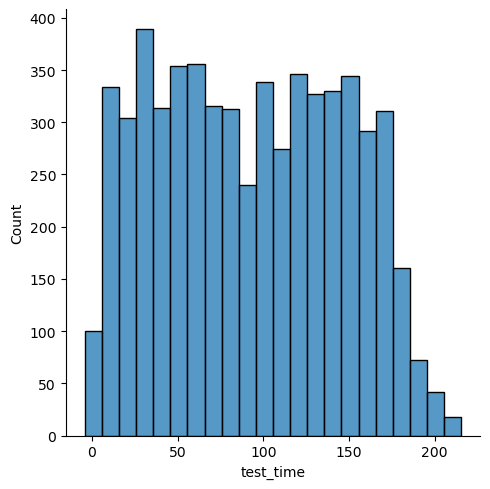

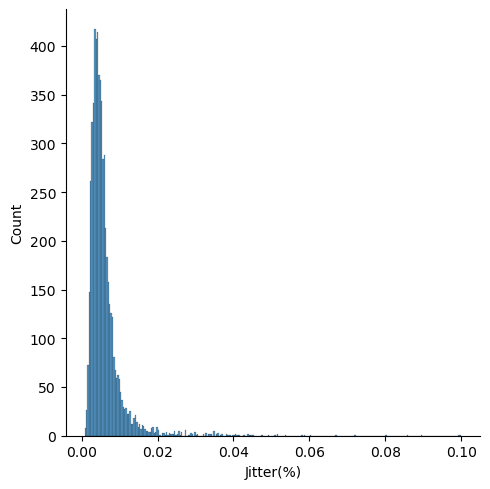

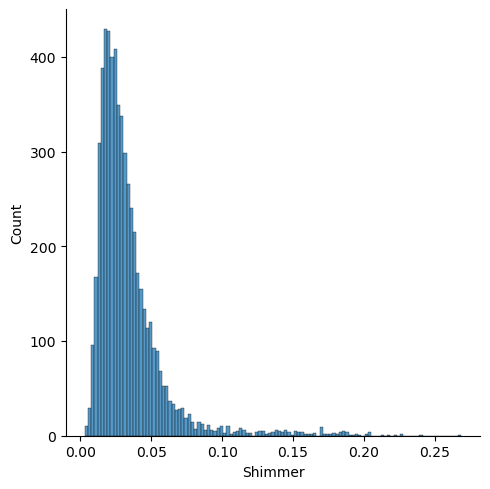

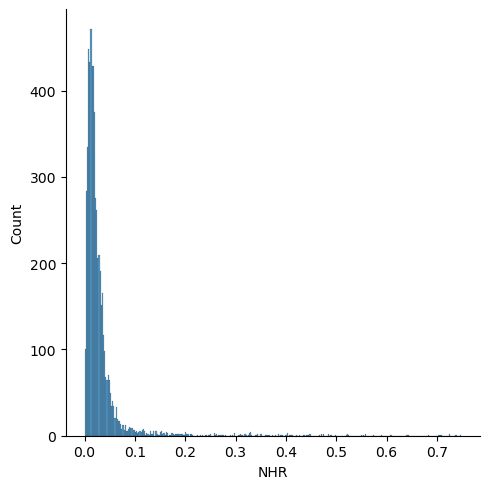

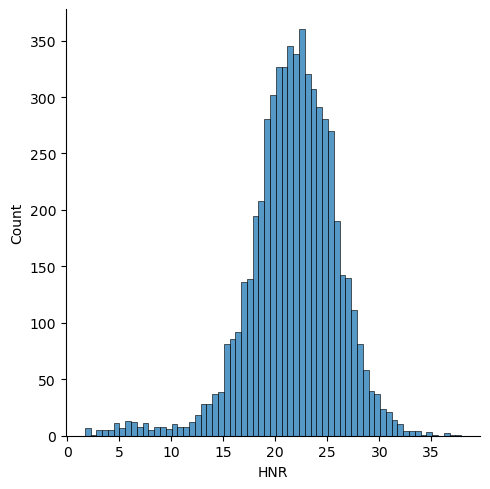

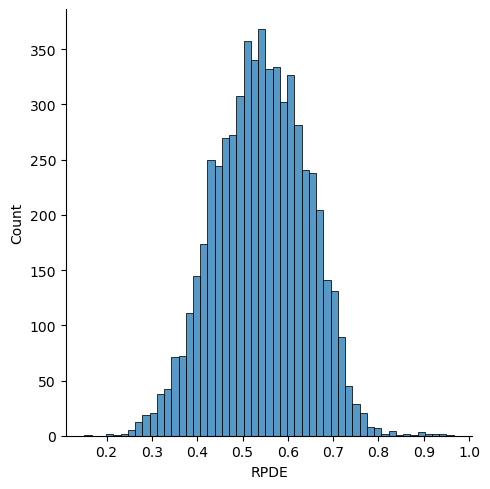

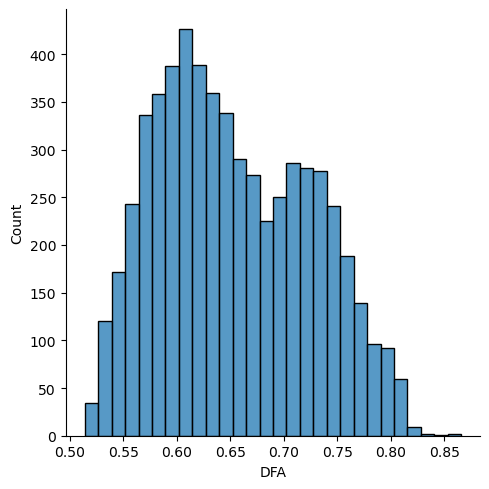

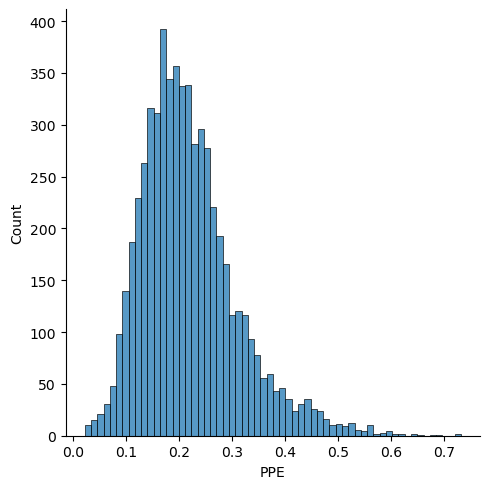

In [15]:
# going to look as the distribution plot to see data distribution for outliers in test time
sns.displot(data = X['test_time'])
sns.displot(data = X['Jitter(%)'])
sns.displot(data = X['Shimmer'])
sns.displot(data = X['NHR'])
sns.displot(data = X['HNR'])
sns.displot(data = X['RPDE'])
sns.displot(data = X['DFA'])
sns.displot(data = X['PPE'])
#distribution looks okay, unsure of what negative test time means for the dataset

    #length of test impacts distribution of results?

<AxesSubplot: >

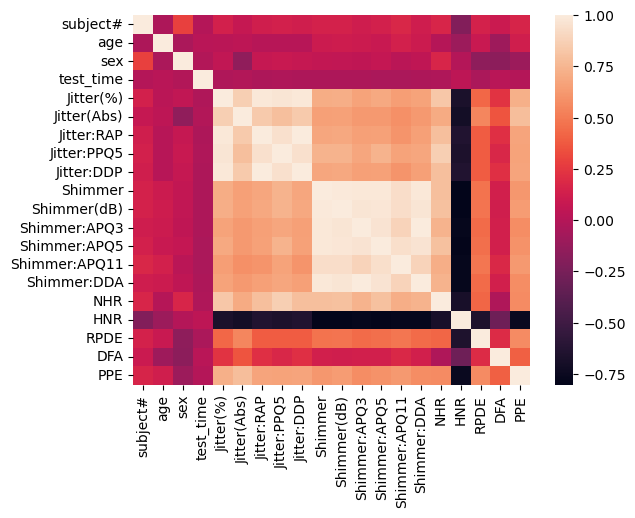

In [16]:
# going to look at the features and see if any have covariance to reduce the number of features later on
corr = X.corr()
sns.heatmap(corr)

In [17]:
#it seems that the shimmer and jitter metrics have impacts on their respective groups, which make sense.
#it may be worth it to only use the jitter percentage and the shimmer values. They are both several measures of variation in frequency (jitter) and amplitude (shimmer)
#feature selection
X = X.drop(['subject#','Jitter(Abs)','Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA'], axis =1)

In [18]:
#train, test, split the dataset for the motor UPDRS score (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [19]:
#train, test, split for the total UPDRS score (y1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size = 0.25, random_state = 42)

In [20]:
# create pipeline to normalize and fit the linear regression model to X and y(motor UPDRS) training data
pipe = Pipeline([
                    ('scaler', MinMaxScaler()),
                    ('reg', LinearRegression())
])

model = pipe.fit(X_train, y_train)

In [21]:
y_pred = model.predict(X_train)
RMSE_train = MSE(y_train, y_pred, squared = False)
r2_train = r2_score(y_train, y_pred)
print(RMSE_train)
print(r2_train)

7.5606698688311305
0.14088578832213616


In [22]:
pipe.score(X_train, y_train)

0.14088578832213616

In [23]:
#not very good scores, need to change the model? should use ridge?


In [24]:
#see coefficients 
reg = LinearRegression().fit(X_train, y_train)
reg.coef_

array([ 2.05738314e-01, -1.98589195e-01,  1.06476966e-02,  6.37196843e+01,
       -3.20415566e+01, -1.64332428e+01, -4.39291153e-01,  1.90883299e-01,
       -2.63691127e+01,  1.33132885e+01])

In [25]:
#looks like there is large variation in the coefficients going to try ridge regression
ridge = Pipeline([
                    ('scaler', StandardScaler()),
                    ('ridgeReg', Ridge(alpha=10))
])

ridge_model = ridge.fit(X_train, y_train)

In [26]:
train_score_ridge = ridge_model.score(X_train, y_train)
train_score_ridge

0.14088233082927837

In [27]:
#bad scores.. maybe data is not linear - need to look into random forest 

In [28]:
random_forest = Pipeline([
                     ('scaler', StandardScaler()), 
                     ('tree', RandomForestRegressor(random_state=42))])

random_forest.fit(X_train, y_train)

scores = cross_val_score(random_forest, X_train, y_train, cv=10)

print(scores.mean())

0.9644829642809036


In [29]:
#this is much better, the model is 96% accurate with the training data
#this indicates that the data is better suited for random forest regression compared to linear
#now need to look at the model against the test data

In [30]:
test_acc = random_forest.score(X_test, y_test)
test_acc

0.963931225737182

In [31]:
test_scores = cross_val_score(random_forest, X_test, y_test, cv=10)
test_acc = test_scores.mean()
print(test_acc)
test_std = test_scores.std()
print(test_std)

0.8666879760544601
0.03298131734307864


In [32]:
y_pred = random_forest.predict(X_test)

<AxesSubplot: xlabel='motor_UPDRS'>

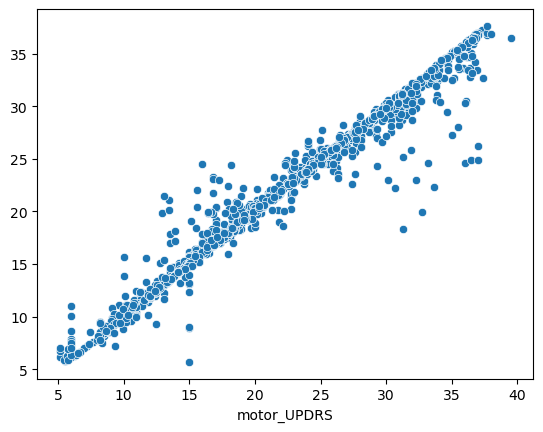

In [33]:
sns.scatterplot(y=y_pred, x=y_test)

In [34]:
#going to run the models on second target variable total_UPDRS (y1)
random_forest.fit(X1_train, y1_train)

y1_scores = cross_val_score(random_forest, X1_train, y1_train, cv=10)

print(y1_scores.mean())

0.9672733909649146


In [35]:
y1_test_scores = cross_val_score(random_forest, X1_test, y1_test, cv=10)
y1_test_acc = y1_test_scores.mean()
print(y1_test_acc)
y1_test_std = y1_test_scores.std()
print(y1_test_std)

0.899131820596277
0.03652844611897102


<AxesSubplot: xlabel='total_UPDRS'>

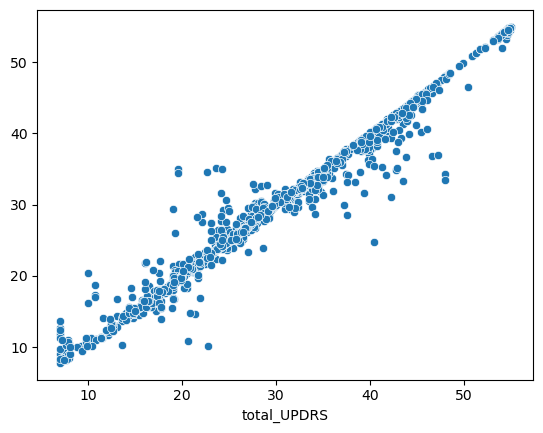

In [36]:
y_pred = random_forest.predict(X1_test)
sns.scatterplot(y=y_pred, x=y1_test)

In [37]:
#Going to use XGBoost model on the data
#fit XGBoost to training dataset with default parameters
boost = xgb.XGBRegressor(verbosity=0)
print(boost)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [38]:
#create xgboost pipeline
boost_pipe = Pipeline([
                    ('scaler', MinMaxScaler()),
                    ('xgb', xgb.XGBRegressor(verbosity=0))
])


In [39]:
#fitting the dataset to the motor UPDRS score dataset (y)
boost_pipe.fit(X_train, y_train)
boost_score = boost_pipe.score(X_train, y_train)
boost_score

0.9955444662078524

In [40]:
#xgboost is a good model, going to fit to the y test dataset
boost_pipe.fit(X_test, y_test)
boost_test_score = boost_pipe.score(X_test, y_test)
boost_test_score

0.9989757353632409

In [41]:
#by = boost y = boost for y variable
#going to cross validate the model for more accurate results - 99 is very optimistic!
by_test_scores = cross_val_score(boost_pipe, X_test, y_test, cv=10)
by_test_acc = by_test_scores.mean()
print(by_test_acc)
by_test_std = by_test_scores.std()
print(by_test_std)


0.8933304131865387
0.02063414756688155


<AxesSubplot: xlabel='motor_UPDRS'>

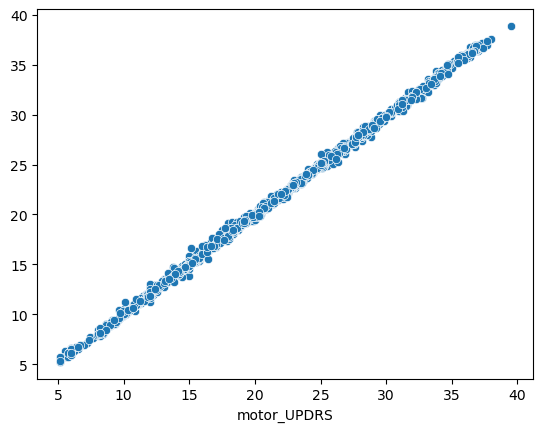

In [42]:
#creating a line plot of the y predicted values and the y test values
y_pred = boost_pipe.predict(X_test)
sns.scatterplot(y=y_pred, x=y_test)

In [43]:
#running boost on the second target variable (y1)
boost_pipe.fit(X1_train, y1_train)
#by1 = boost y1
by1_scores = cross_val_score(boost_pipe, X1_train, y1_train, cv=10)

print(by1_scores.mean())

0.9583384772260952


In [44]:
#run on second target variable test set (y1) test
boost_pipe.fit(X1_test, y1_test)
boost_test_score = boost_pipe.score(X1_test, y1_test)
boost_test_score

0.9993360522217738

In [45]:
#going to cross validate the test dataset for more accurate results
by1_test_scores = cross_val_score(boost_pipe, X1_test, y1_test, cv=10)
by1_test_acc = by1_test_scores.mean()
print(by1_test_acc)
by1_test_std = by1_test_scores.std()
print(by1_test_std)

0.9126636087657294
0.026706806651310474


<AxesSubplot: xlabel='total_UPDRS'>

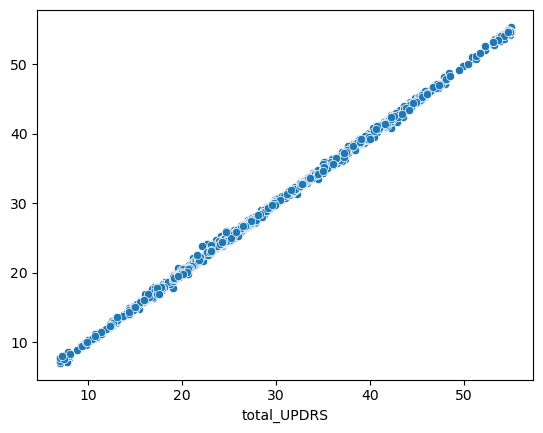

In [46]:
y_pred = boost_pipe.predict(X1_test)
sns.scatterplot(y=y_pred, x=y1_test)

## Task 8: Results

Use the following text block to summarize your results. How will you communicate the answer to your research question to stakeholders?

- Research question: Can we predict disease progression/symptoms in early PD patients using their motor and total UPDRS scores?
Based on our models, we are able to predict disease progression with 99% accuracy in early PD patients using their motor and total UPDRS scores and with fewer attributes than called for in the study. Since jitter and shimmer variables are highly dependent on each other, one variable can be assigned to each and still predict progression accurately. The total UPDRS score model is more accurate compared to the motor UPDRS scores, indicating that vocal data may be more impactful to more than just the motor section of the UPDRS questionnaire. 

## Task 1: Slide Deck

Create and present a slide deck to your classmates showing how you answered your research question.  You can find a Slide Template in the course materials or create your own.  The presentation should be about five minutes long.

## Task 2: Reflection

Use the following text block to reflect on the project. Did you run into anything that was particularly difficult? What part(s) of the project did you enjoy most? Did your results leave you with any new questions you'd investigate if you had more time?

I was having difficulties trying to come up with different models when the linear regression wasn't working well in the beginning. After I tried out the random forest regressor models, things went better and I was able to obtain good results with both random forest and XGBoost. I enjoyed checking the models and talking through the importance of this kind of information. Any data about diseases like Parkinson's can be helpful in improving future research and medical advancements. If I were to investigate this project more, I would like to learn more about the differences between the UPDRS sections and the differences between the shimmer and jitter attributes, perhaps a different metric of each would have been better. Diseases are complicated, but since the UPDRS is a fairly simple way of assessing symptoms, this model could be a good way to quickly get a feel for disease progression